<a href="https://colab.research.google.com/github/lucaspinheiro27/Python_statistics/blob/main/Jupyter_notebooks/Permutation_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Features
* Campaign Name: The name of the campaign
* Date: Date of the record
* Spend: Amount spent on the campaign in dollars
* of Impressions: Number of impressions the ad crossed through the campaign
* Reach: The number of unique impressions received in the ad
* of Website Clicks: Number of website clicks received through the ads
* of Searches: Number of users who performed searches on the website
* of View Content: Number of users who viewed content and products on the website
* of Add to Cart: Number of users who added products to the cart
* of Purchase: Number of purchases


In [439]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [440]:
control_group = pd.read_csv("/content/control_group.csv", sep = ";")
test_group = pd.read_csv("/content/test_group.csv", sep = ";")

In [441]:
control_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [442]:
test_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [443]:
combined_group = pd.concat([control_group, test_group], ignore_index=True)
combined_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [444]:
combined_group.dropna(inplace=True)
combined_group.isnull().sum()

,0
Campaign Name,0
Date,0
Spend [USD],0
# of Impressions,0
Reach,0
# of Website Clicks,0
# of Searches,0
# of View Content,0
# of Add to Cart,0
# of Purchase,0


In [445]:
combined_group['Date'] = pd.to_numeric(combined_group['Date'].str.replace('.', ''), errors='coerce')

In [446]:
combined_group['Date'] = pd.to_datetime(combined_group['Date'], format='%d%m%Y')

# Permutation test

$$
{}^nP_r = \frac{n!}{(n-r)!}
$$

Text(0.5, 0.98, '')

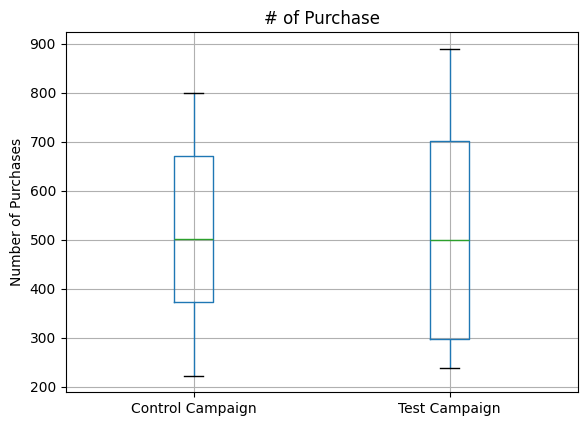

In [447]:
ax = combined_group.boxplot(by='Campaign Name', column='# of Purchase')
ax.set_xlabel('')
ax.set_ylabel('Number of Purchases')
plt.suptitle('')

In [448]:
mean_a = combined_group[combined_group['Campaign Name'] == 'Control Campaign']['# of Purchase'].mean()
mean_b = combined_group[combined_group['Campaign Name'] == 'Test Campaign']['# of Purchase'].mean()
difference = mean_a - mean_b

print(f"Mean Purchases for Campaign A: {mean_a}")
print(f"Mean Purchases for Campaign B: {mean_b}")
print(f"Difference in Mean Purchases: {difference}")

Mean Purchases for Campaign A: 522.7931034482758
Mean Purchases for Campaign B: 521.2333333333333
Difference in Mean Purchases: 1.5597701149424665


* Campaign A has more purchases than Campaign B by 1.55 on average

* Histogram

In [449]:
# x = The input dataset
# nA = refers to the group A
# nB = refers to the group B
def perm_fun(x, nA, nB):
    if nA + nB > len(x):
        raise ValueError("The sum of the groups must be less than or equal to the length of the data.")
#Generates a range of indices corresponding to the elements in x. Randomly selects nB unique indices from the range of indices. Converts the list of selected indices into Group B
    idx_B = set(random.sample(range(len(x)), nB))
#Creates a set of all indices not in idx_B. Randomly selects nA unique indices from the remaining indices. Converts the list of selected indices into Group A.
    idx_A = set(random.sample(set(range(len(x))) - idx_B, nA))
#Selects the elements of x corresponding to the indices in idx_B. Calculates the mean
    mean_B = x.iloc[list(idx_B)].mean()
#Selects the elements of x corresponding to the indices in idx_A
    mean_A = x.iloc[list(idx_A)].mean()
# Returns the difference between them
    return mean_B - mean_A

In [450]:
nA = (combined_group['Campaign Name'] == 'Control Campaign').sum()
nB = (combined_group['Campaign Name'] == 'Test Campaign').sum()
x = combined_group['# of Purchase']

In [451]:
perm_diffs = [perm_fun(x, nA, nB) for _ in range(1000)] #1000 assigns to the number of permutations

<ipython-input-449-fea97af8e6a5>:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  idx_A = set(random.sample(set(range(len(x))) - idx_B, nA))


Text(0, 0.5, 'Frequency')

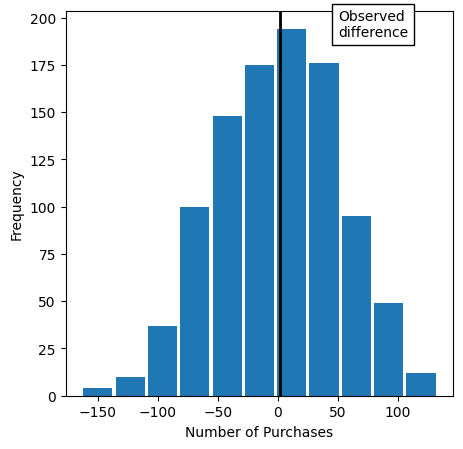

In [452]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = difference, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Number of Purchases')
ax.set_ylabel("Frequency")

In [453]:
np.mean(perm_diffs > mean_b - mean_a)

0.522